# **Data Preprocessing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_file_path = '/content/drive/MyDrive/Staragile Assignment/hotel_bookings.csv'

In [4]:
df = pd.read_csv(csv_file_path)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.nunique().sort_values()

hotel                                2
is_canceled                          2
is_repeated_guest                    2
arrival_date_year                    3
deposit_type                         3
reservation_status                   3
customer_type                        4
required_car_parking_spaces          5
meal                                 5
babies                               5
distribution_channel                 5
children                             5
total_of_special_requests            6
market_segment                       8
reserved_room_type                  10
arrival_date_month                  12
assigned_room_type                  12
adults                              14
previous_cancellations              15
stays_in_weekend_nights             17
booking_changes                     21
arrival_date_day_of_month           31
stays_in_week_nights                35
arrival_date_week_number            53
previous_bookings_not_canceled      73
days_in_waiting_list     

In [8]:
columns_cat = df.columns[df.nunique()<25]
for cat in columns_cat:
  print(f"{cat}      : {df[cat].unique()}")

hotel      : ['Resort Hotel' 'City Hotel']
is_canceled      : [0 1]
arrival_date_year      : [2015 2016 2017]
arrival_date_month      : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
stays_in_weekend_nights      : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
adults      : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children      : [ 0.  1.  2. 10.  3. nan]
babies      : [ 0  1  2 10  9]
meal      : ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment      : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel      : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
is_repeated_guest      : [0 1]
previous_cancellations      : [ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]
reserved_room_type      : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type      : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
booking_changes      : [ 3  4  0  1  2 

### **Dealing with duplicate values**

In [9]:
df.duplicated().sum()

31994

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(87396, 32)

### **Dealing with missing values**

In [12]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [13]:
df.drop(['agent','company'], axis=True, inplace=True)
df.dropna(inplace=True)
df.shape

(86940, 30)

### **Dealing with outlier values**

In [14]:
def remove_outilers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1
  lower_bound = Q1-IQR
  upper_bound = Q3+IQR
  print("Q1          : ", Q1)
  print("Q3          : ", Q3)
  print("IQR         : ", IQR)
  print("Lower_bound : ", lower_bound)
  print("Uower_bound : ", upper_bound)

  return df[(df[column]>= lower_bound)&(df[column]<=upper_bound)]

In [15]:
df_cleaned = remove_outilers(df,'adr')

Q1          :  72.25
Q3          :  134.1
IQR         :  61.849999999999994
Lower_bound :  10.400000000000006
Uower_bound :  195.95


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79608 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79608 non-null  object 
 1   is_canceled                     79608 non-null  int64  
 2   lead_time                       79608 non-null  int64  
 3   arrival_date_year               79608 non-null  int64  
 4   arrival_date_month              79608 non-null  object 
 5   arrival_date_week_number        79608 non-null  int64  
 6   arrival_date_day_of_month       79608 non-null  int64  
 7   stays_in_weekend_nights         79608 non-null  int64  
 8   stays_in_week_nights            79608 non-null  int64  
 9   adults                          79608 non-null  int64  
 10  children                        79608 non-null  float64
 11  babies                          79608 non-null  int64  
 12  meal                           

In [17]:
print("Shape Before Cleaned : ", df.shape)
print("Shape Afer Cleaned   : ",df_cleaned.shape)

Shape Before Cleaned :  (86940, 30)
Shape Afer Cleaned   :  (79608, 30)


# **EDA Analysis**

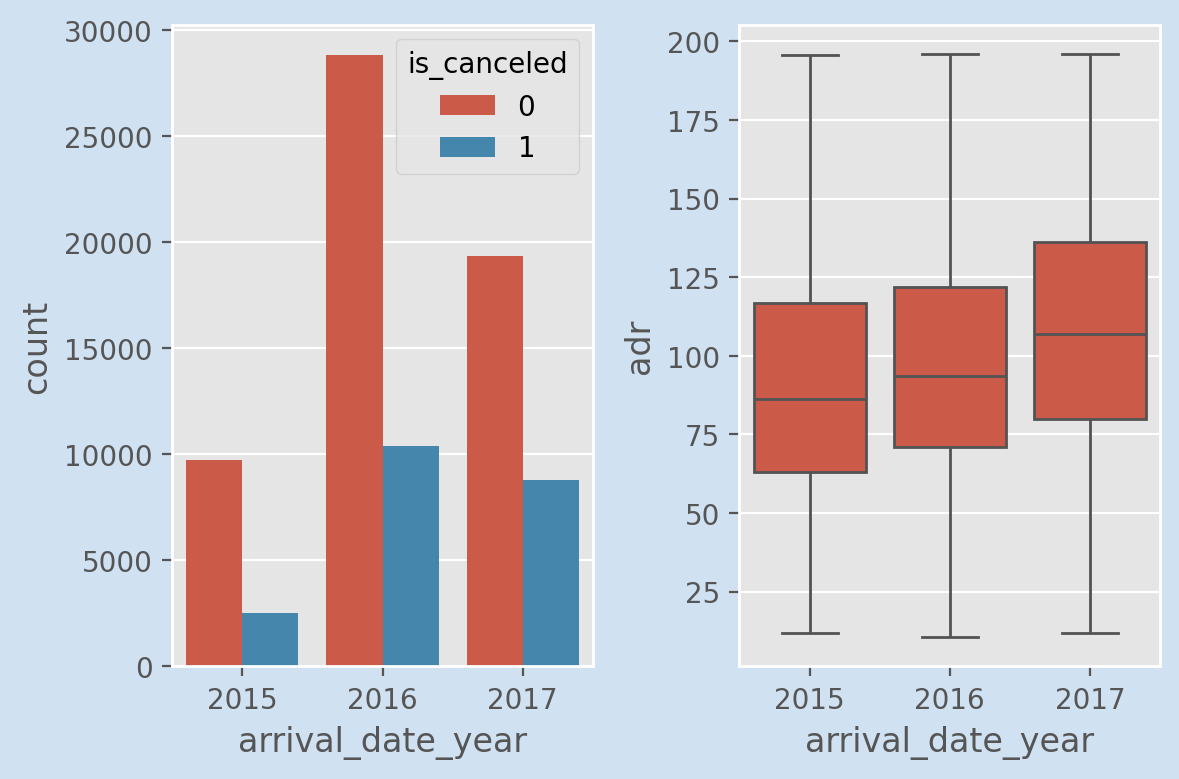

In [18]:
plt.figure(figsize=(6,4), dpi=200, facecolor = '#d0e1f2')
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df_cleaned)

plt.subplot(1,2,2)
sns.boxplot(x='arrival_date_year', y='adr', data=df_cleaned)

plt.tight_layout()
plt.show()

                          No of bookings  Percentage
hotel        is_canceled                            
City Hotel   0                     35071   69.809706
             1                     15167   30.190294
Resort Hotel 0                     22831   77.735785
             1                      6539   22.264215


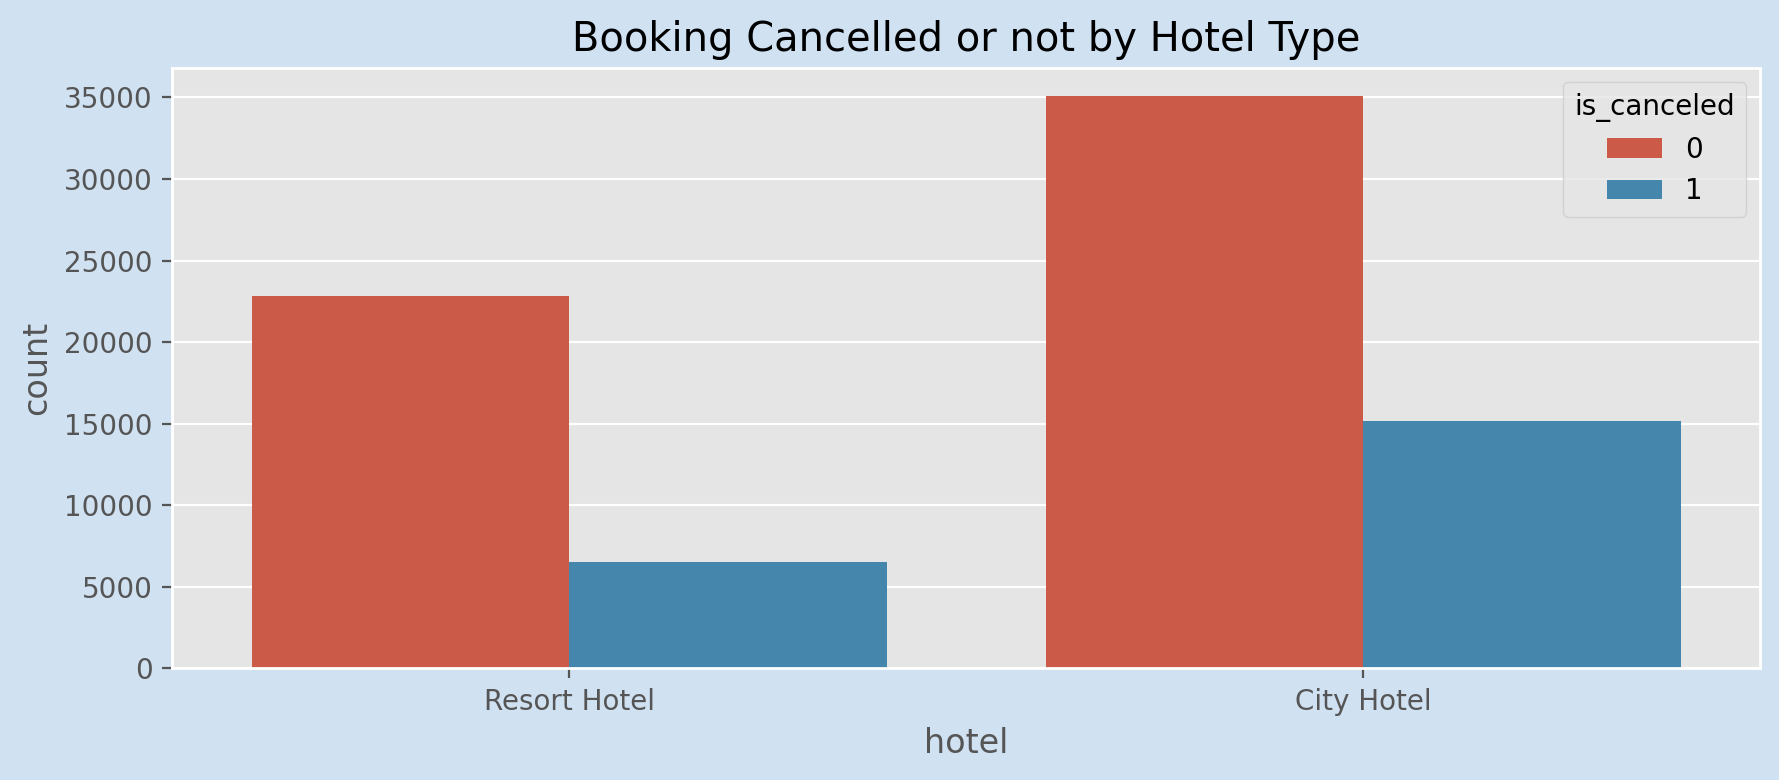

In [19]:
bk_info = pd.DataFrame(df_cleaned.groupby('hotel')['is_canceled'].value_counts())
bk_info.columns=['No of bookings']
bk_info["Percentage"] =df_cleaned.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100
print(bk_info)

plt.figure(figsize=(9,4), dpi=200, facecolor = '#d0e1f2')
sns.countplot(x='hotel', hue='is_canceled', data=df_cleaned)
plt.title('Booking Cancelled or not by Hotel Type')

plt.tight_layout()
plt.show()

              No of Bookings  Percentage
Hotel                                   
City Hotel             50238   63.106723
Resort Hotel           29370   36.893277


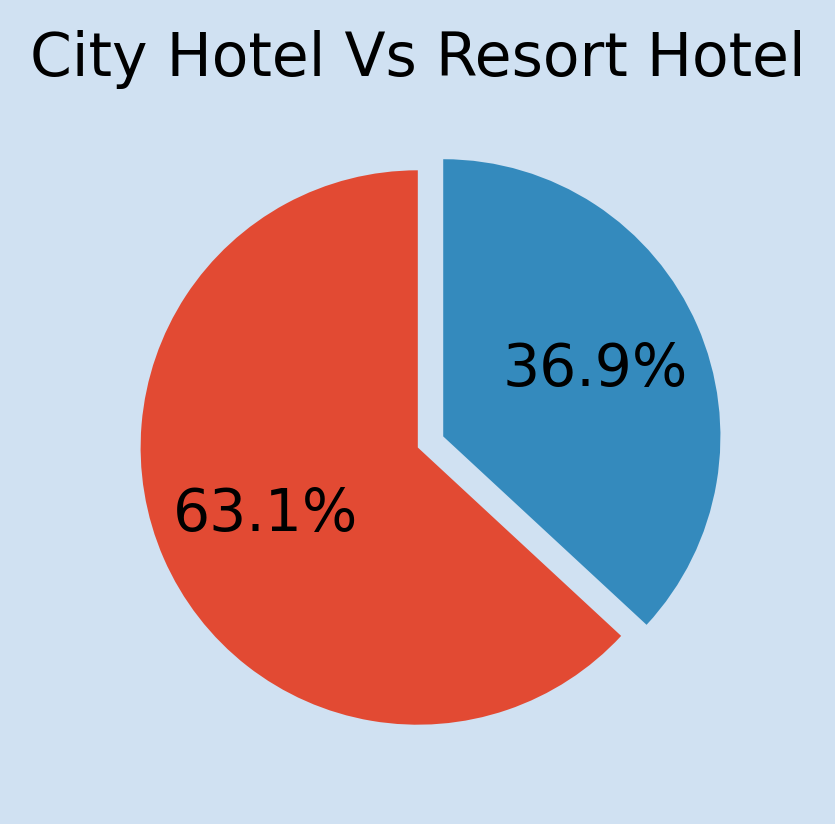

In [20]:
#Checking which type of hotel more
preference = pd.DataFrame(df_cleaned.hotel.value_counts())
preference['Percentage'] = df_cleaned.hotel.value_counts(normalize=True)*100
preference.index.name = 'Hotel'
preference.rename({'hotel': 'No of Bookings'}, axis=1, inplace=True)

labels = df_cleaned['hotel'].value_counts().index.tolist()


print(preference)
plt.figure(figsize=(3,3), dpi=300, facecolor = '#d0e1f2')
plt.pie(df_cleaned.hotel.value_counts(), autopct="%1.1f%%",explode=[0,0.1],startangle=90,textprops={'fontsize': 14})
plt.title("City Hotel Vs Resort Hotel")
plt.show()

In [21]:
#Checking month having highest number of arrivals
confbkd = df_cleaned.loc[df_cleaned.is_canceled==0]
confbkd.reset_index(drop=True, inplace=True)
canbkd = df_cleaned.loc[df_cleaned.is_canceled==1]
confbkd.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0          0               2015               July   
4  Resort Hotel            0          9               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     GBR         Direct               Direct                  0   
1   BB     GBR      Corporate            Corporate                  0   
2   BB     GBR      Online TA                TA/TO                  0   
3   BB     PRT         Direct               Direct                  0   
4   FB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  A   
1                       0                               0                  A   
2                       0                               0                  A   
3                       0                               0                  C   
4                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                0   No Deposit                     0   
1                  A                0   No Deposit                     0   
2                  A                0   No Deposit                     0   
3                  C                0   No Deposit                     0   
4                  C                0   No Deposit                     0   

  customer_type    adr  required_car_parking_spaces  \
0     Transient   75.0                            0   
1     Transient   75.0                            0   
2     Transient   98.0                            0   
3     Transient  107.0                            0   
4     Transient  103.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-02  
1                          0          Check-Out              2015-07-02  
2                          1          Check-Out              2015-07-03  
3                          0          Check-Out              2015-07-03  
4                          1          Check-Out              2015-07-03

In [22]:
cancel = df_cleaned[df_cleaned['is_canceled'] == 1].groupby('arrival_date_month')['is_canceled'].count()
confirm = df_cleaned[df_cleaned['is_canceled'] == 0].groupby('arrival_date_month')['is_canceled'].count()

arr = pd.DataFrame(df_cleaned[df_cleaned['is_canceled'] == 1].groupby('arrival_date_month')['is_canceled'].count())
arr.columns = ['Cancel']
arr['Confirm'] = df_cleaned[df_cleaned['is_canceled'] == 0].groupby('arrival_date_month')['is_canceled'].count()
arr['perct_bkd_mth'] = df_cleaned.groupby('arrival_date_month')['is_canceled'].count()/len(df)*100

arr['Percentage_confirmed'] = (confirm / (confirm + cancel)) * 100
arr['Percentage_cancel'] = (cancel / (confirm + cancel)) * 100
arr['ADR'] = df.groupby('arrival_date_month')['adr'].mean()


arr

Cancel  Confirm  perct_bkd_mth  Percentage_confirmed  \
arrival_date_month                                                         
April                 2284     5203       8.611686             69.493789   
August                2638     5843       9.755003             68.895177   
December              1332     3446       5.495744             72.122227   
February              1375     4467       6.719577             76.463540   
January               1022     3468       5.164481             77.238307   
July                  2695     5906       9.893030             68.666434   
June                  2183     5091       8.366690             69.989002   
March                 1777     5443       8.304578             75.387812   
May                   2282     5569       9.030366             70.933639   
November              1029     3733       5.477341             78.391432   
October               1563     4993       7.540833             76.159243   
September             1526     4740       7.207269             75.646345   

                    Percentage_cancel         ADR  
arrival_date_month                                 
April                       30.506211  103.862297  
August                      31.104823  150.905732  
December                    27.877773   81.677767  
February                    23.536460   75.009341  
January                     22.761693   70.392288  
July                        31.333566  135.617708  
June                        30.010998  119.812031  
March                       24.612188   81.904267  
May                         29.066361  111.268740  
November                    21.608568   73.031456  
October                     23.840757   90.426680  
September                   24.353655  112.117067

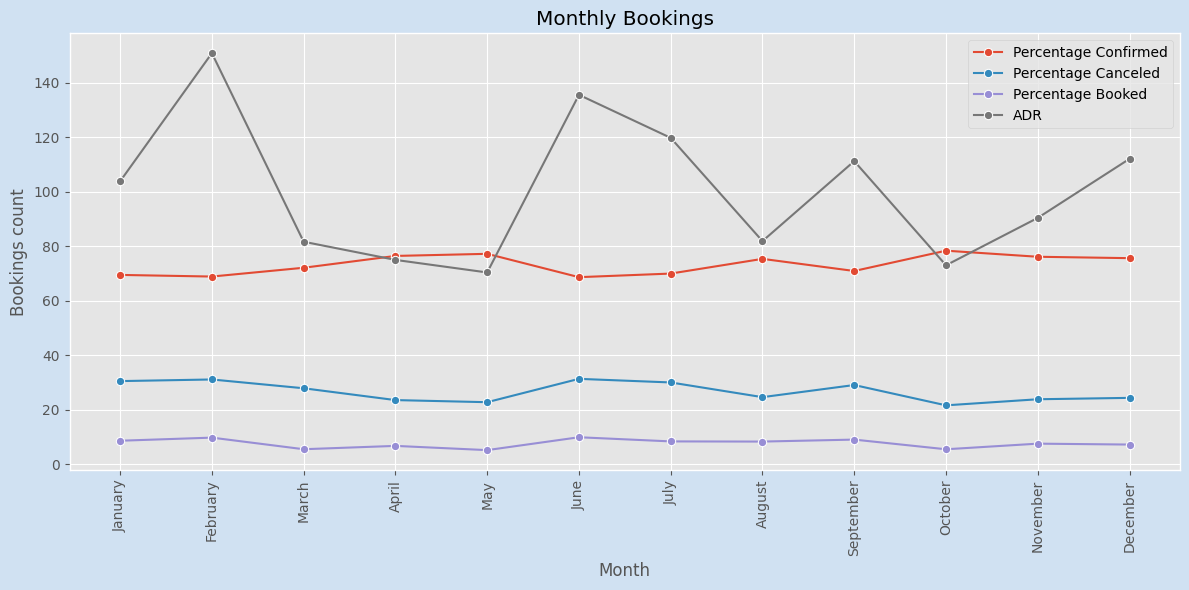

In [23]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6), facecolor = '#d0e1f2')
sns.lineplot(y=arr['Percentage_confirmed'], x=arr.index,marker='o', label='Percentage Confirmed')
sns.lineplot(y=arr['Percentage_cancel'], x=arr.index,marker='o', label='Percentage Canceled')
sns.lineplot(y=arr['perct_bkd_mth'], x=arr.index,marker='o', label='Percentage Booked')

sns.lineplot(y=arr['ADR'], x=arr.index,marker='o', label='ADR')


plt.xlabel('Month')
plt.ylabel('Bookings count')
plt.title('Monthly Bookings')
plt.xticks(range(len(months_order)), months_order, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()





In [24]:
object_columns = df_cleaned.select_dtypes(include=['object']).columns
object_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [25]:
num_columns = df_cleaned.select_dtypes(include=['int','float']).columns
num_columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

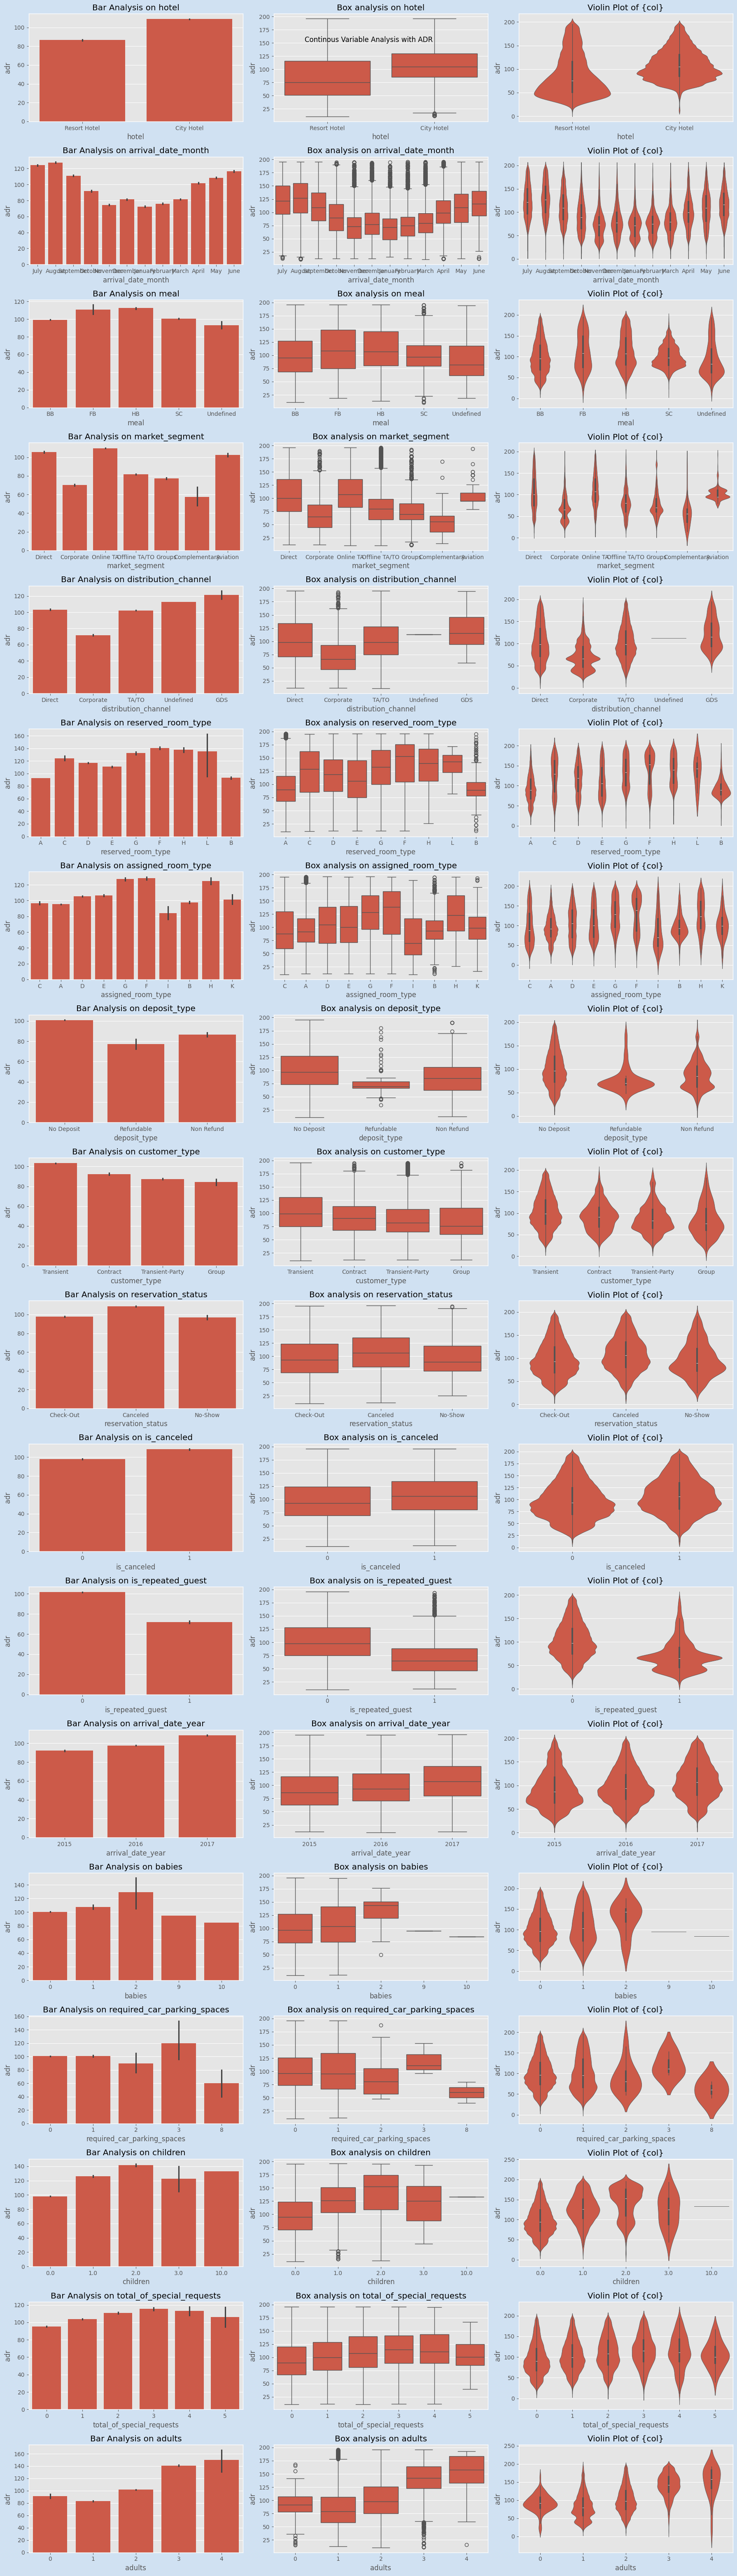

In [26]:
#Checking relation between ADR and continous variable
obj_col = ['hotel', 'arrival_date_month', 'meal','market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status','is_canceled','is_repeated_guest','arrival_date_year','babies','required_car_parking_spaces','children','total_of_special_requests','adults']
n = len(obj_col)
x = 1

plt.figure(figsize=(18,63),facecolor = '#d0e1f2' )
plt.suptitle("Continous Variable Analysis with ADR")

for col in obj_col:
  plt.subplot(n,3,x)
  sns.barplot(x=col, y='adr', data=df_cleaned)
  plt.title(f"Bar Analysis on {col}")
  x +=1

  plt.subplot(n,3,x)
  sns.boxplot(x=col, y='adr', data=df_cleaned)
  plt.title(f"Box analysis on {col}")
  x+=1

  plt.subplot(n,3,x)
  sns.violinplot(x=col, y='adr', data=df_cleaned)
  plt.title("Violin Plot of {col}")
  x+=1

plt.tight_layout()
plt.show()

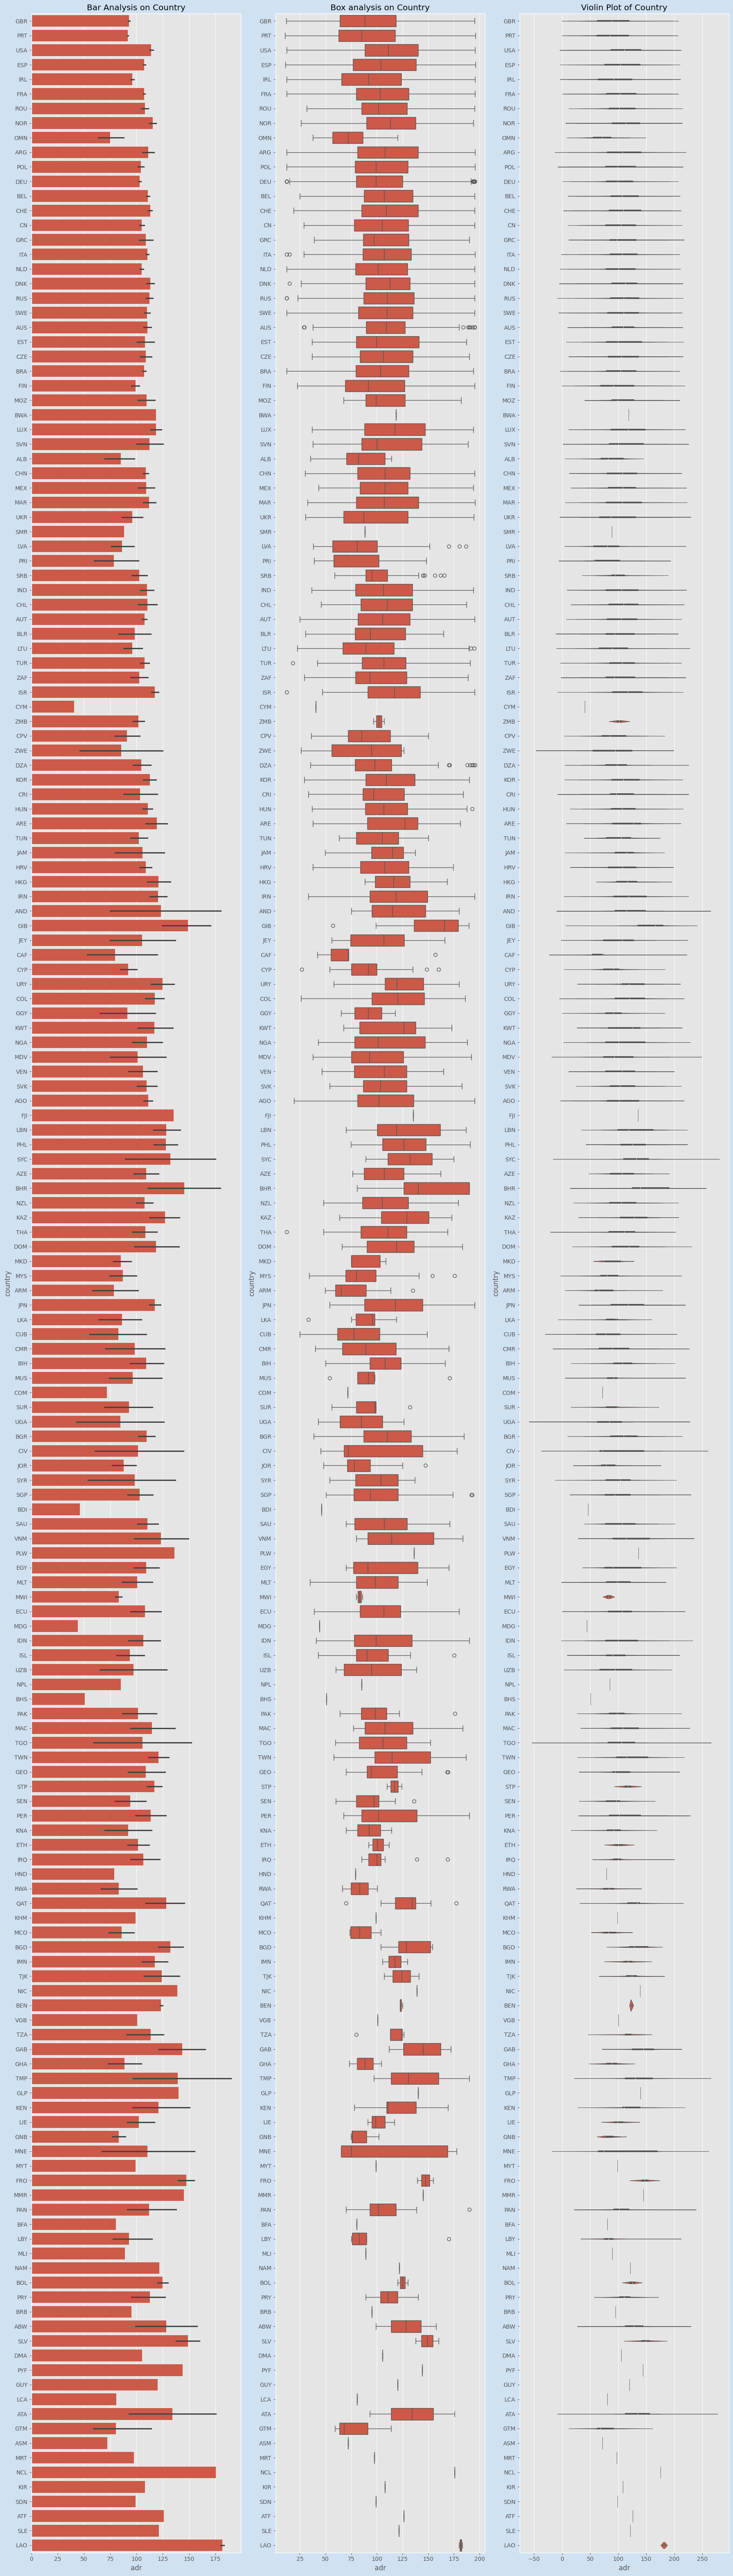

In [27]:
plt.figure(figsize=(18,63),facecolor = '#d0e1f2' )
plt.subplot(1,3,1)
sns.barplot(y='country', x='adr', data=df_cleaned)
plt.title(f"Bar Analysis on Country")

plt.subplot(1,3,2)
sns.boxplot(y='country', x='adr', data=df_cleaned)
plt.title(f"Box analysis on Country")

plt.subplot(1,3,3)
sns.violinplot(y='country', x='adr', data=df_cleaned)
plt.title("Violin Plot of Country")

plt.tight_layout()
plt.show()

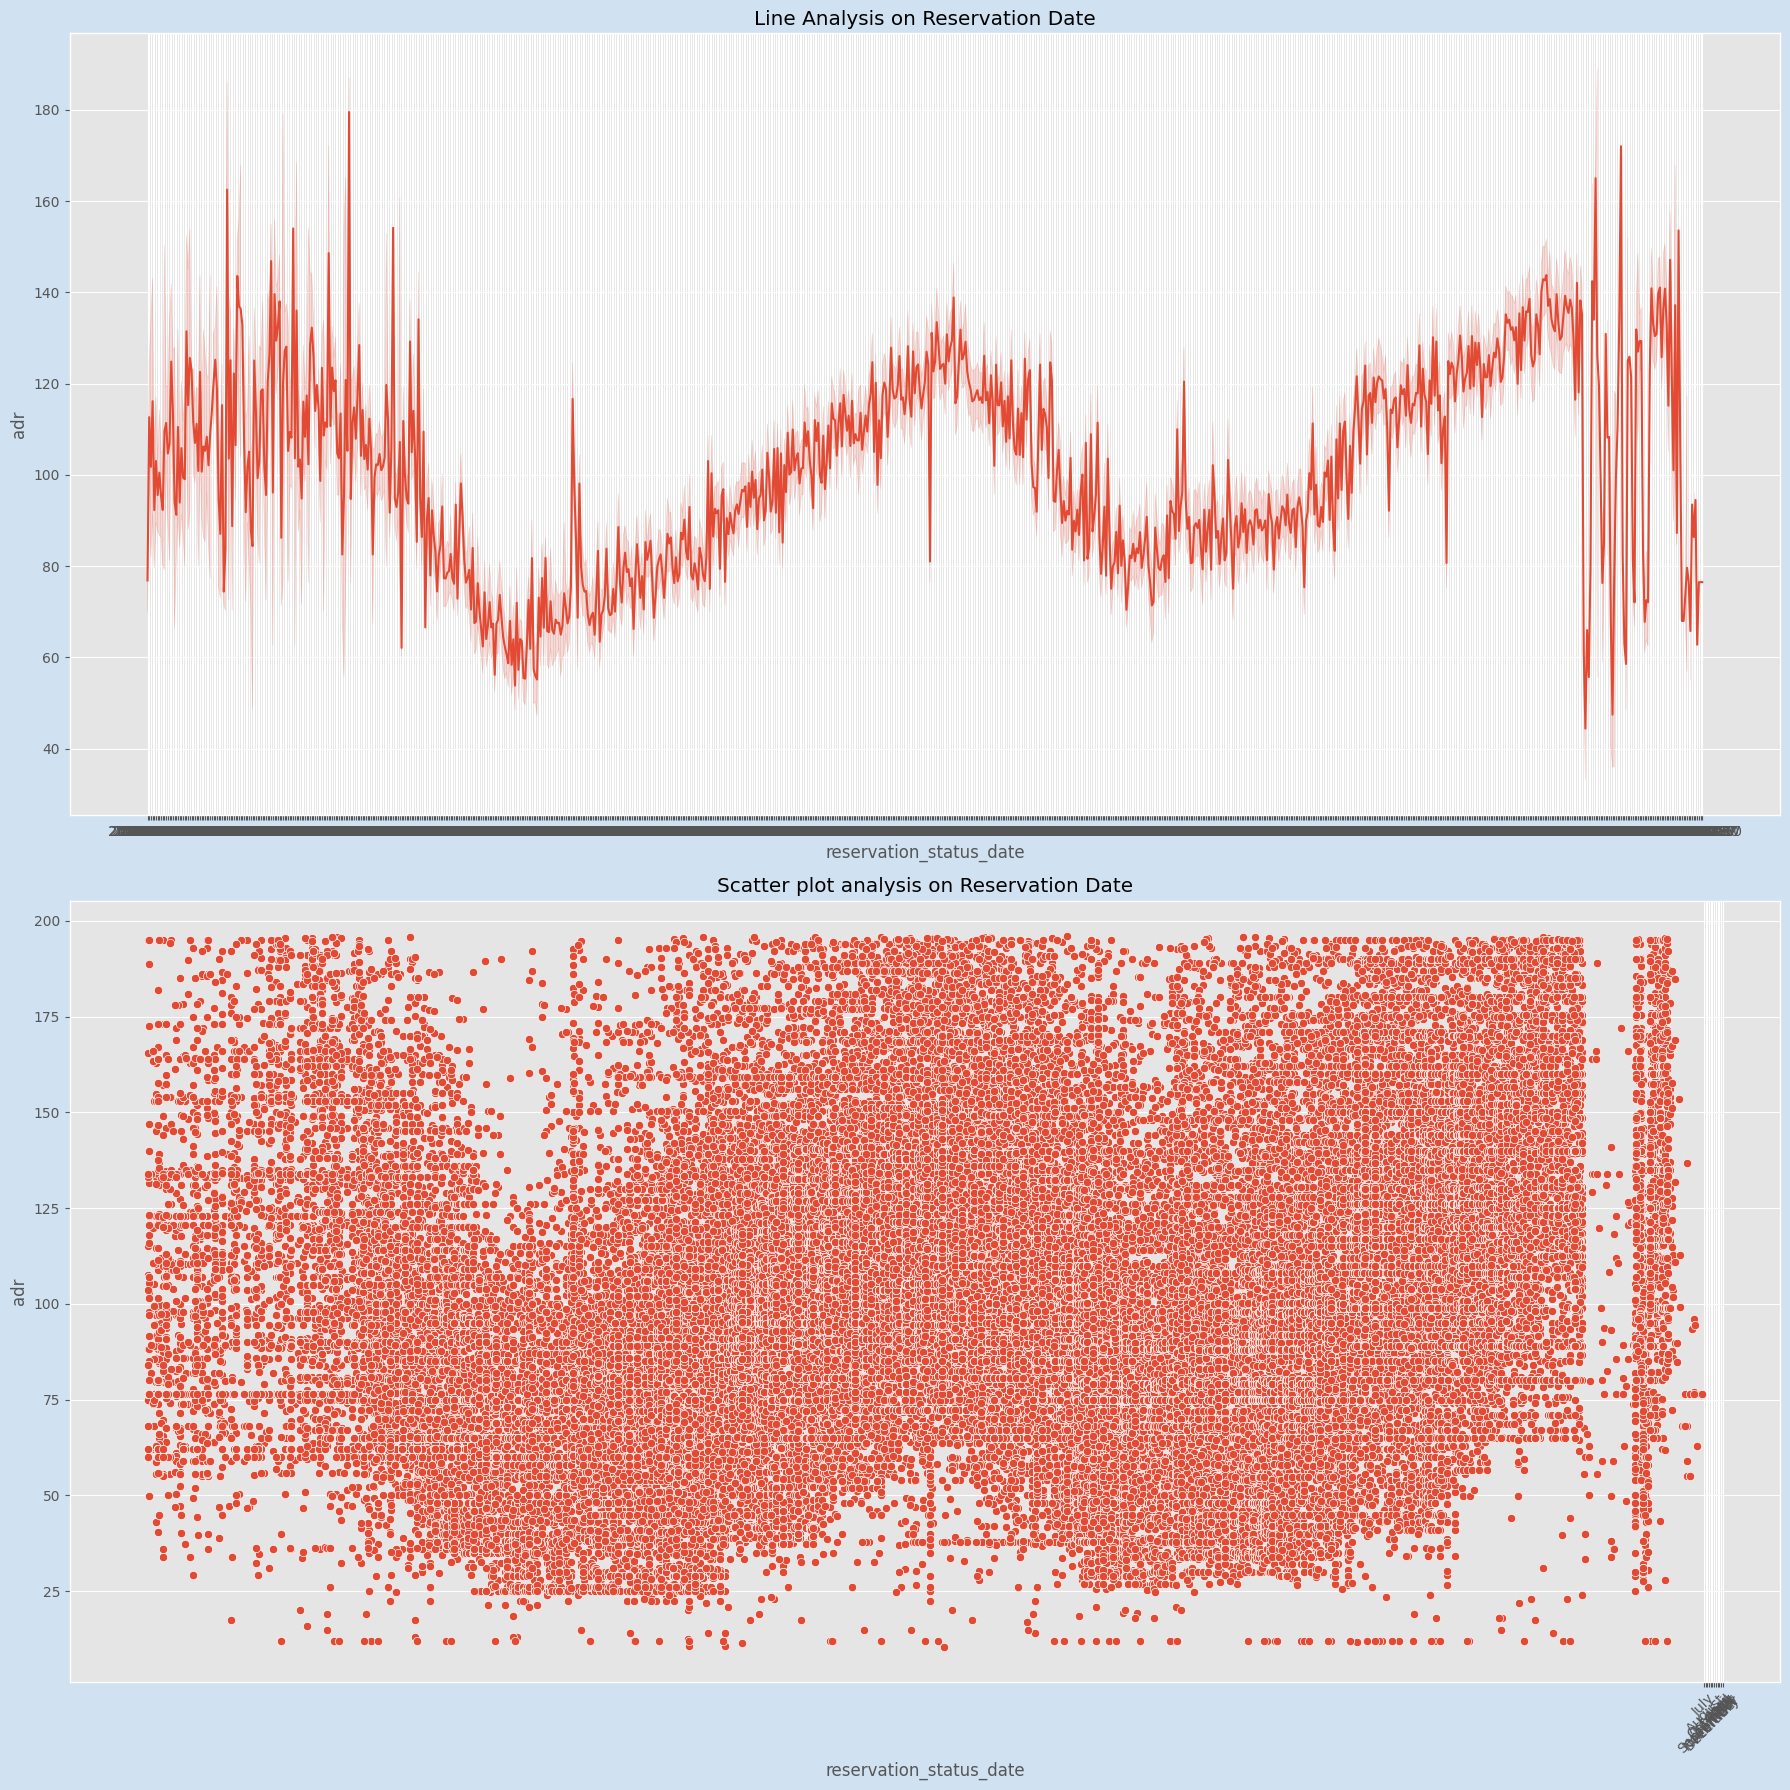

In [28]:
plt.figure(figsize=(18, 18), facecolor='#d0e1f2')

plt.subplot(2, 1, 1)
sns.lineplot(x='reservation_status_date', y='adr', data=df_cleaned)
plt.title("Line Analysis on Reservation Date")

plt.subplot(2, 1, 2)
sns.scatterplot(x='reservation_status_date', y='adr', data=df_cleaned)
plt.title("Scatter plot analysis on Reservation Date")
plt.xticks(df_cleaned['arrival_date_month'].unique(), rotation=45)


plt.tight_layout()
plt.show()

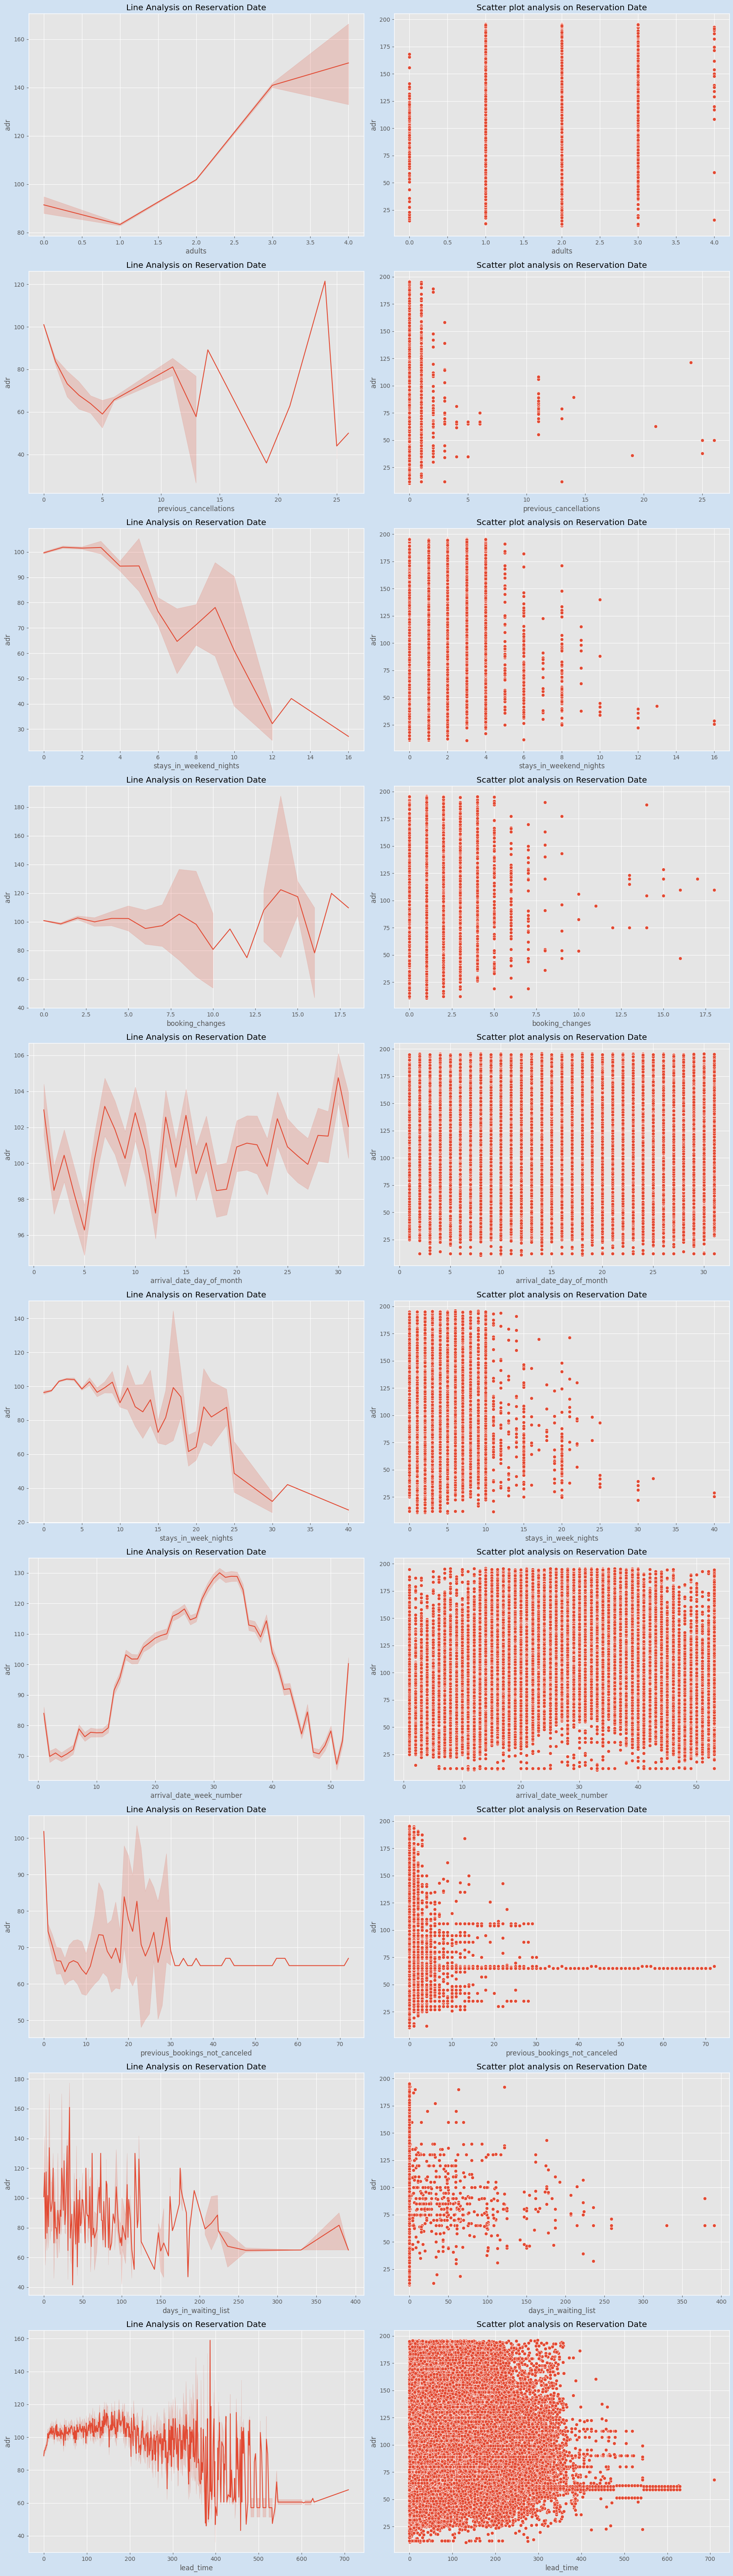

In [29]:
num_col = ['adults','previous_cancellations','stays_in_weekend_nights','booking_changes','arrival_date_day_of_month','stays_in_week_nights','arrival_date_week_number','previous_bookings_not_canceled','days_in_waiting_list','lead_time']
n = len(num_col)
x = 1

plt.figure(figsize=(18,63),facecolor = '#d0e1f2' )
for num in num_col:
  plt.subplot(n,2,x)
  sns.lineplot(x=num, y='adr', data = df_cleaned)
  plt.title("Line Analysis on Reservation Date")
  x+=1

  plt.subplot(n,2,x)
  sns.scatterplot(x=num, y='adr', data = df_cleaned)
  plt.title("Scatter plot analysis on Reservation Date")
  x+=1

plt.tight_layout()
plt.show()

# **Handling with Catagorical Values**

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df_cleaned.columns:
  if df_cleaned[col].dtype=='object':

    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

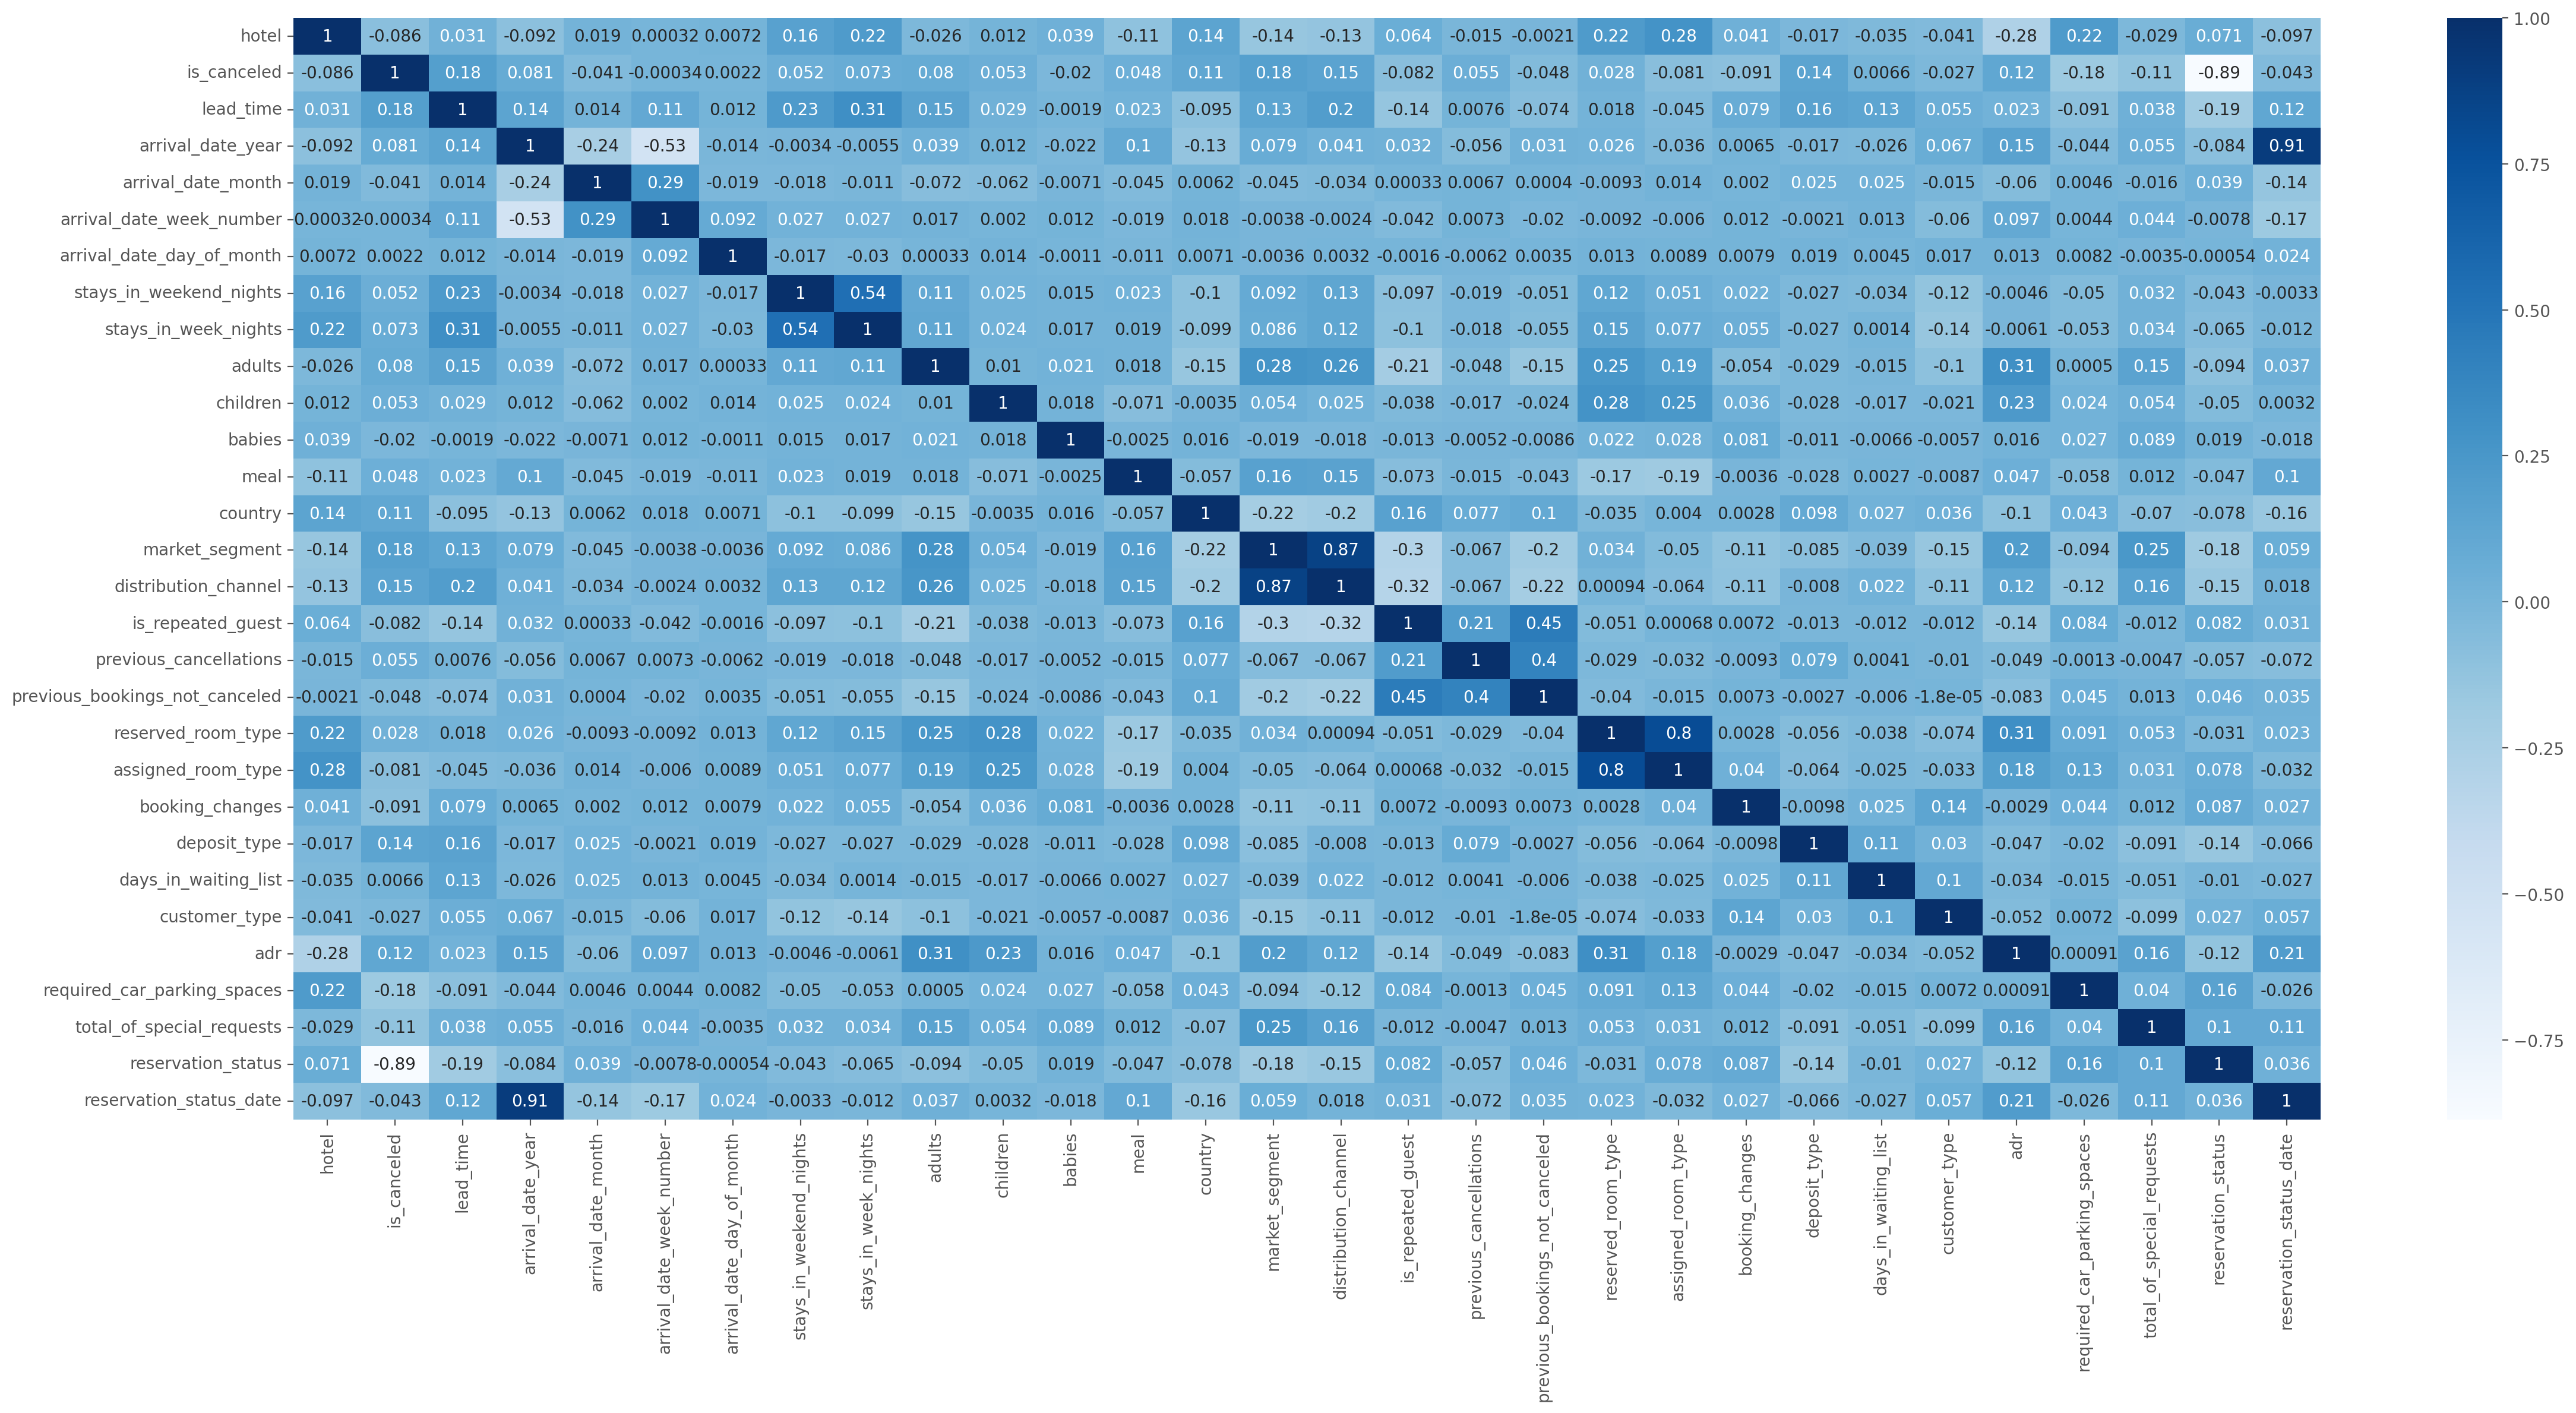

In [31]:
matrics = df_cleaned.corr()

plt.figure(figsize=(24,12), dpi=200)
sns.heatmap(matrics, annot=True, cmap='Blues')

plt.tight_layout()
plt.show()

# **Predictive Modelling**

In [32]:
df_cleaned.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   
6      1            0          0               2015                   5   
7      1            0          9               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
2     0       57               3                     1                  0   
3     0       57               2                     0                  0   
4     0       57               6                     3                  0   
6     0      133               3                     1                  0   
7     1      133               3                     1                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   
6                       0                               0                   2   
7                       0                               0                   2   

   assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
2                   2                0             0                     0   
3                   0                0             0                     0   
4                   0                0             0                     0   
6                   2                0             0                     0   
7                   2                0             0                     0   

   customer_type    adr  required_car_parking_spaces  \
2              2   75.0                            0   
3              2   75.0                            0   
4              2   98.0                            0   
6              2  107.0                            0   
7              2  103.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  
2                          0                   1                      115  
3                          0                   1                      115  
4                          1                   1                      116  
6                          0                   1                      116  
7                          1                   1                      116

### **Splitting the data into training and test sets**

In [33]:
X = df_cleaned.drop(['adr'], axis=1)
Y = df_cleaned[['adr']]
X.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   
6      1            0          0               2015                   5   
7      1            0          9               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
2     0       57               3                     1                  0   
3     0       57               2                     0                  0   
4     0       57               6                     3                  0   
6     0      133               3                     1                  0   
7     1      133               3                     1                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   
6                       0                               0                   2   
7                       0                               0                   2   

   assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
2                   2                0             0                     0   
3                   0                0             0                     0   
4                   0                0             0                     0   
6                   2                0             0                     0   
7                   2                0             0                     0   

   customer_type  required_car_parking_spaces  total_of_special_requests  \
2              2                            0                          0   
3              2                            0                          0   
4              2                            0                          1   
6              2                            0                          0   
7              2                            0                          1   

   reservation_status  reservation_status_date  
2                   1                      115  
3                   1                      115  
4                   1                      116  
6                   1                      116  
7                   1                      116

In [34]:
Y.head()

adr
2   75.0
3   75.0
4   98.0
6  107.0
7  103.0

In [35]:
print('Independent Features Set Shape : ', X.shape)
print("Dependent Features Shape       : ", Y.shape)

Independent Features Set Shape :  (79608, 29)
Dependent Features Shape       :  (79608, 1)


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [37]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labesls Shape : ', y_test.shape)

Training Data Shape   :  (63686, 29)
Training Labels Shape :  (63686, 1)
Testing Data Shape    :  (15922, 29)
Testing Labesls Shape :  (15922, 1)


## **Artificial Neural Network Traning**

In [38]:
model = tf.keras.models.Sequential()
model.add(Dense(128, activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [39]:
model.compile(
    optimizer='adam',
    loss = 'mean_squared_error'
)

In [44]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size = 32,
    validation_data = (x_test,y_test),
    verbose = 1
)

Epoch 1/50
1991/1991 [==============================] - 8s 4ms/step - loss: 383.5684 - val_loss: 386.7812
Epoch 2/50
1991/1991 [==============================] - 6s 3ms/step - loss: 381.6450 - val_loss: 371.3875
Epoch 3/50
1991/1991 [==============================] - 8s 4ms/step - loss: 382.7119 - val_loss: 383.8122
Epoch 4/50
1991/1991 [==============================] - 8s 4ms/step - loss: 381.4781 - val_loss: 394.2754
Epoch 5/50
1991/1991 [==============================] - 7s 3ms/step - loss: 378.1410 - val_loss: 378.2037
Epoch 6/50
1991/1991 [==============================] - 6s 3ms/step - loss: 377.6969 - val_loss: 372.4384
Epoch 7/50
1991/1991 [==============================] - 7s 3ms/step - loss: 377.0854 - val_loss: 385.6641
Epoch 8/50
1991/1991 [==============================] - 5s 3ms/step - loss: 376.0502 - val_loss: 379.4120
Epoch 9/50
1991/1991 [==============================] - 7s 3ms/step - loss: 372.9622 - val_loss: 386.8366
Epoch 10/50
1991/1991 [=======================

In [45]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

## **Evaluation of Model**

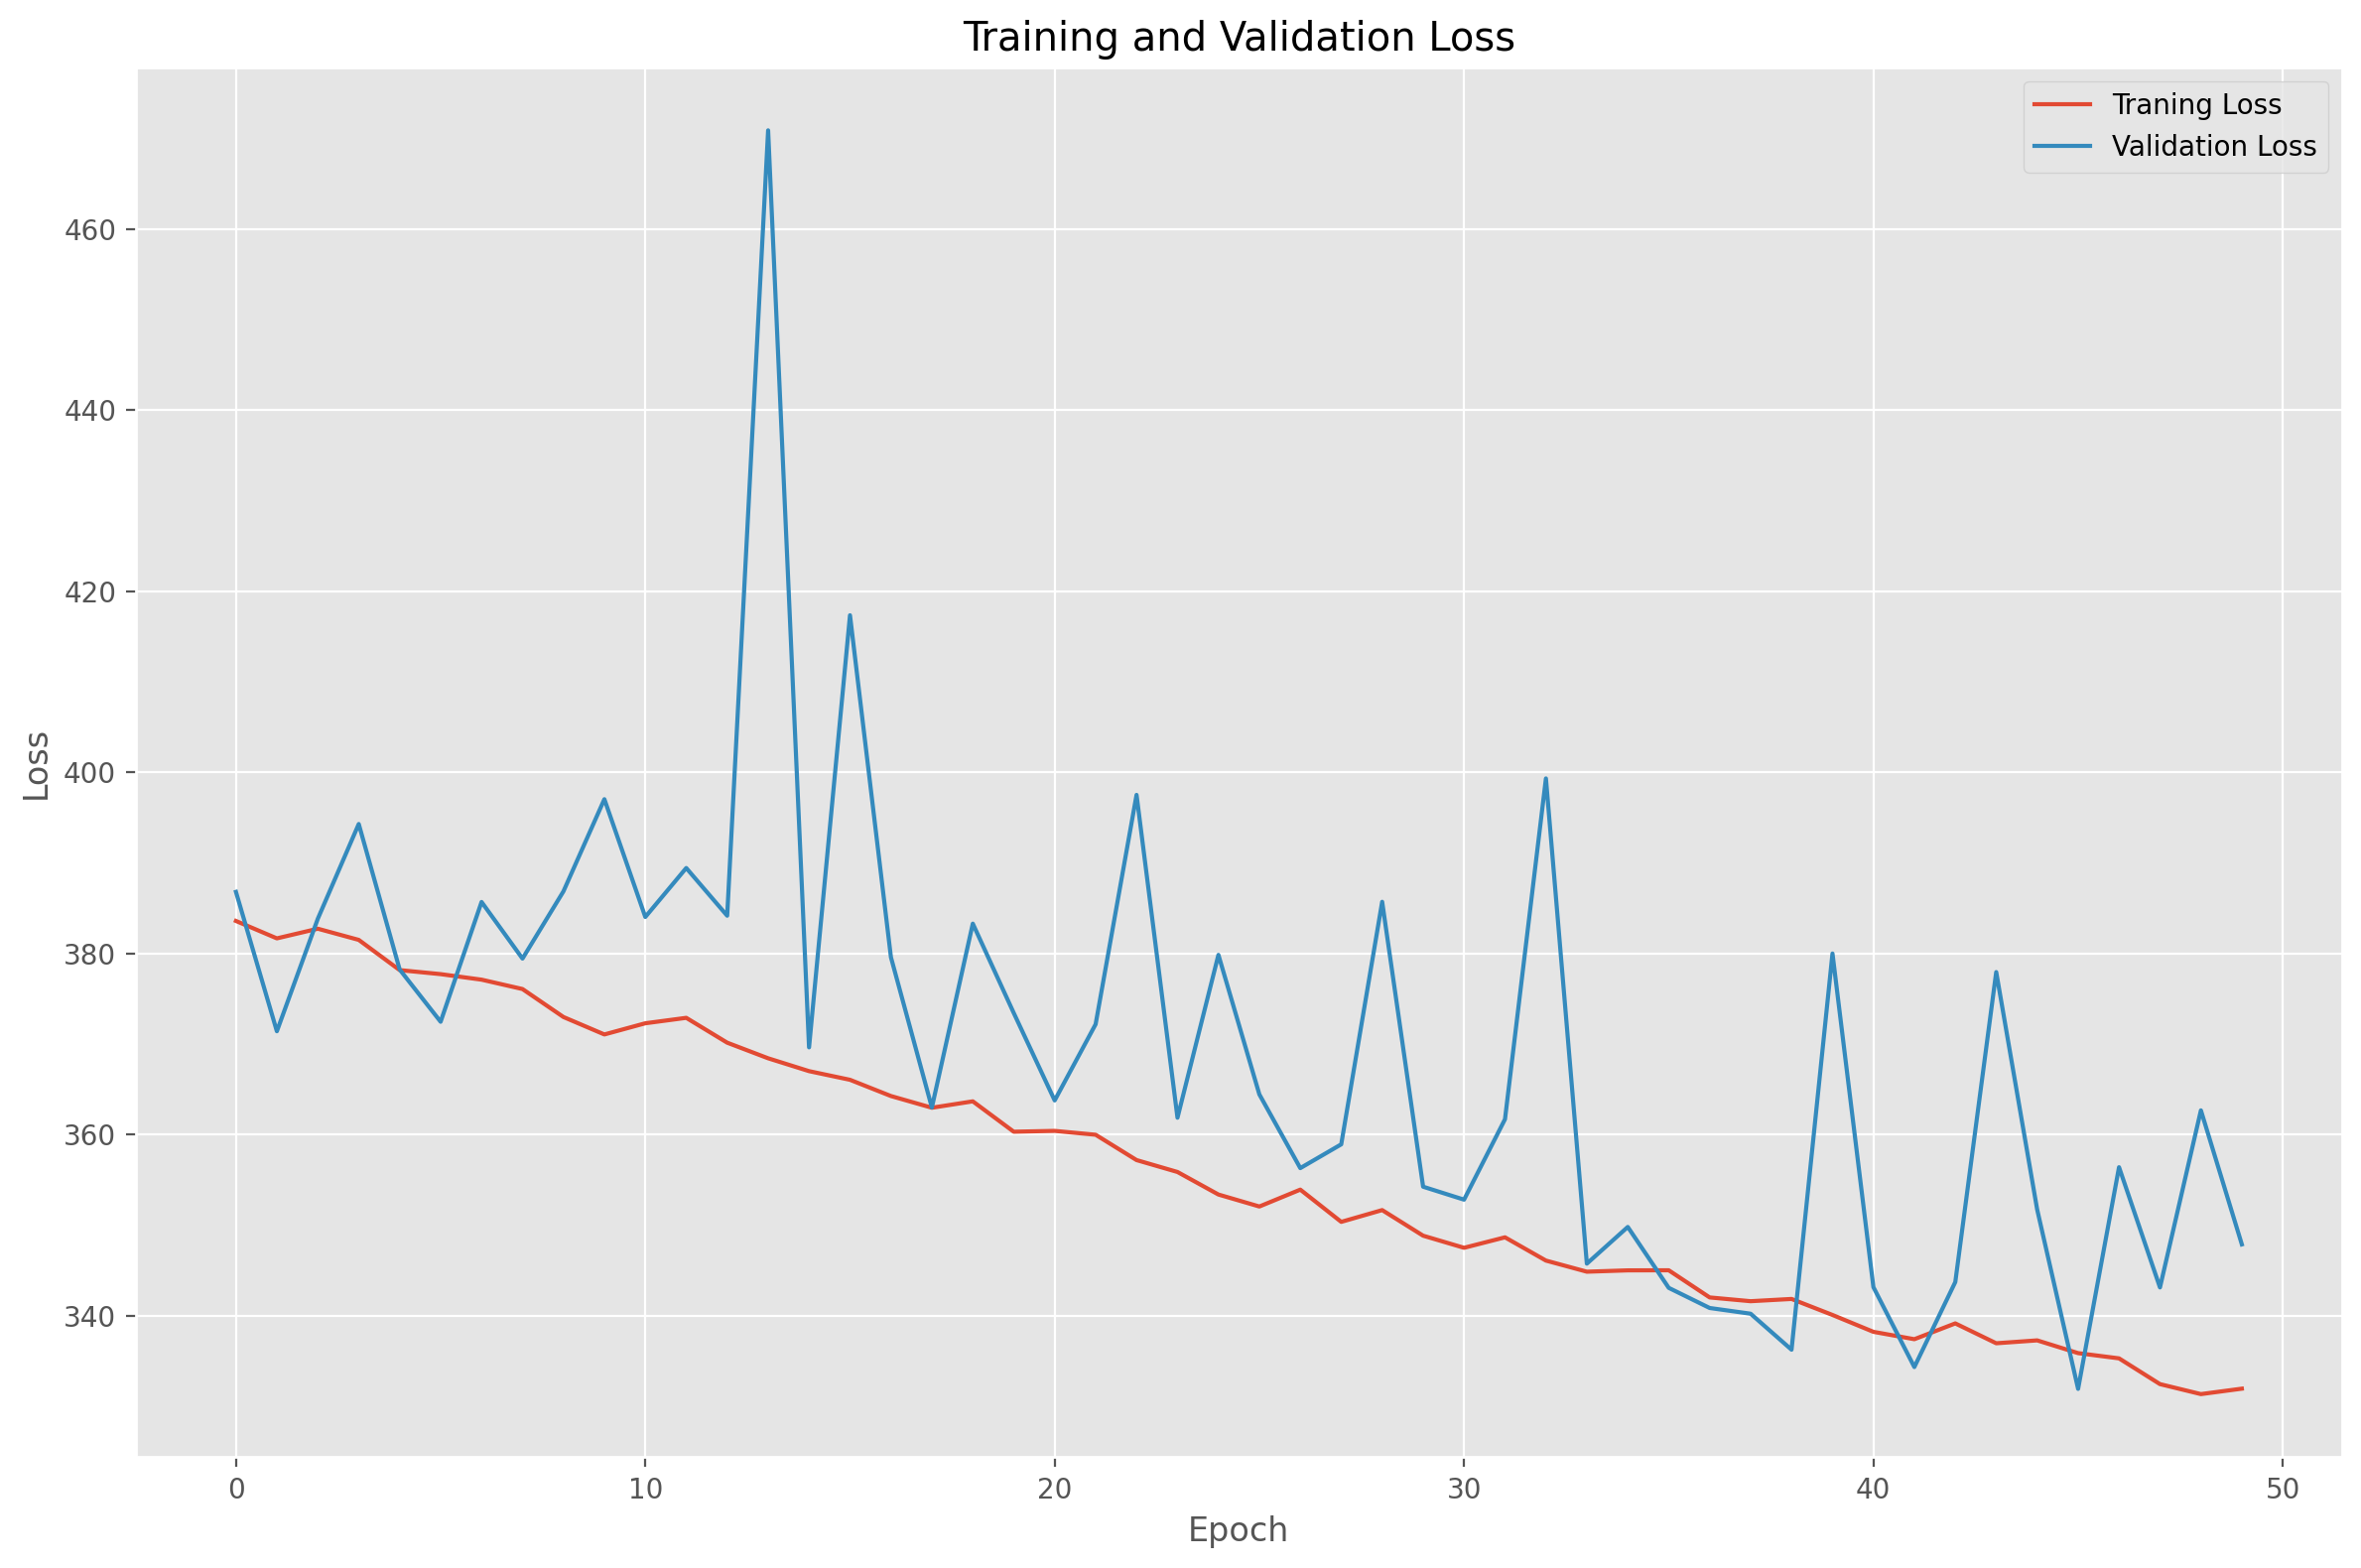

In [46]:
traning_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(12,8), dpi=200)
plt.plot(traning_loss, label='Traning Loss')
plt.plot(validation_loss, label = "Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')

plt.legend()
plt.tight_layout()
plt.show()